In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [25]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
# creating nonlinear data with degree 2
x = 6 * np.random.rand(200,1) - 3
y = 0.8 * x**2 + .9 * x + 2 + np.random.rand(200,1) * 3

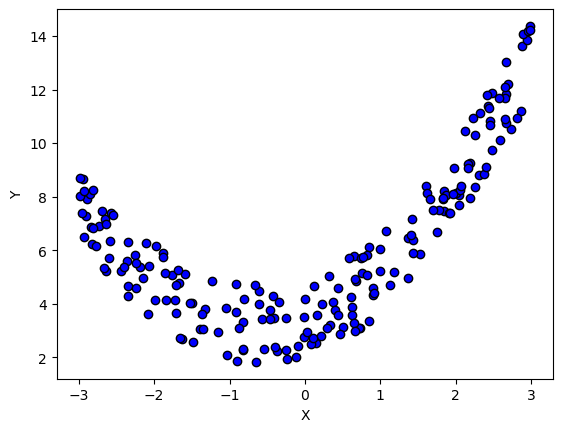

In [3]:
# plotting data
plt.scatter(x,y,color="blue",ec="black")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [4]:
# splitting data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=2)

# fitting linear model
lr = LinearRegression()
lr.fit(x_train,y_train)

# getting r2 score
y_predicted = lr.predict(x_test)
r2 = r2_score(y_test,y_predicted)
print(f"R2 score==>{r2:.2f}")

R2 score==>0.22


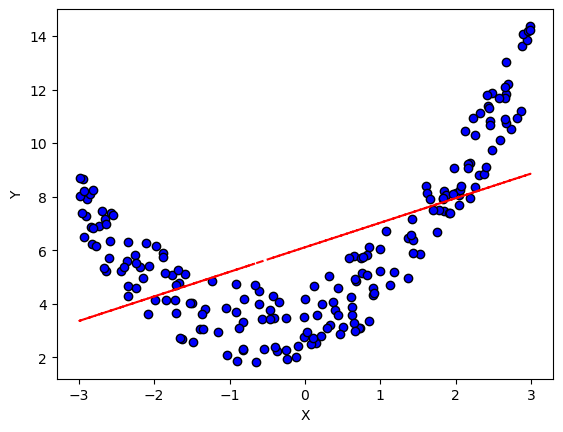

In [5]:
# plotting data and the best fit line
plt.scatter(x,y,color="blue",ec="black")
plt.plot(x,lr.predict(x),"r--")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [6]:
# creating polynomial with degree 2
poly = PolynomialFeatures(degree=2,include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_train_poly,y_train)

y_predicted_poly = poly_model.predict(x_test_poly)
print("R2 Score==>",r2_score(y_test,y_predicted_poly))

R2 Score==> 0.8576728990469682


In [7]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_trans_poly = poly.transform(x_new)
y_new = poly_model.predict(x_trans_poly)

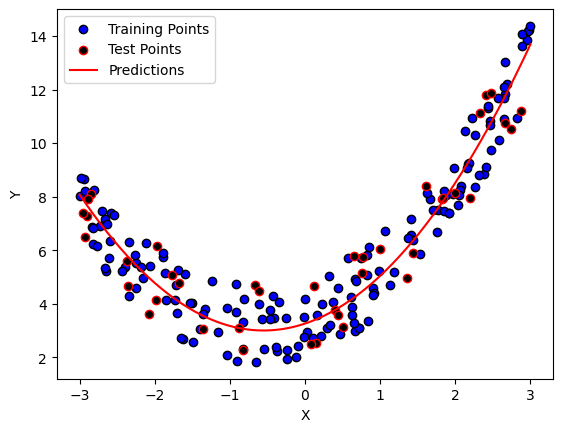

In [8]:
plt.scatter(x_train,y_train,color='blue',ec="black",label ="Training Points")
plt.scatter(x_test,y_test,color="black",ec="red",label ="Test Points")
plt.plot(x_new,y_new,"r-",label="Predictions")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [19]:
def polynomial_regression(degree):
    x_new  = np.linspace(-3,3,100).reshape(100,1)
    x_new_poly = poly.transform(x_new)
    
    poly_feature = PolynomialFeatures(degree=degree,include_bias=False)
    std_scalor = SGDRegressor()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", poly_feature),
            ("std_scaler", std_scalor),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x,y)
    y_new_big = polynomial_regression.predict(x_new)    
    
    plt.scatter(x_train,y_train,color='blue',ec="black",label ="Training Points")
    plt.scatter(x_test,y_test,color="black",ec="red",label ="Test Points")
    plt.plot(x_new,y_new_big,"r-",label="Predictions")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-3,3,0,10])
    plt.legend(loc="upper_left")
    plt.show()    

In [32]:
# Codes Hands on ml book
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)

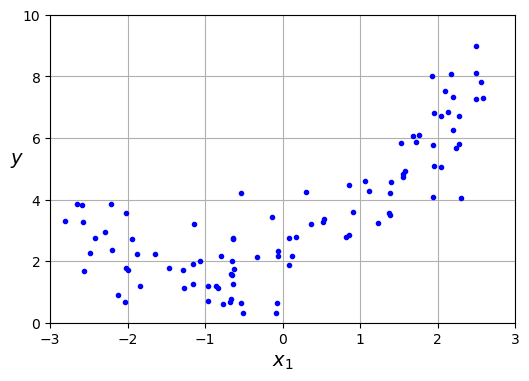

In [33]:
# plotting graph
plt.figure(figsize=(6,4))
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

In [35]:
poly_features = PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly,y)
model.intercept_,model.coef_

(array([2.06248289]), array([[1.00868348, 0.51098086]]))

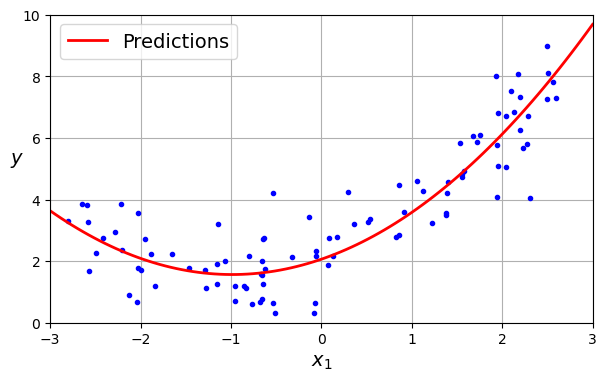

In [41]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_trans_poly = poly_features.transform(X_new)
y_new = model.predict(X_trans_poly)

plt.figure(figsize=(7,4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([-3,3,0,10])
plt.legend(loc="upper left")
plt.grid()
plt.show()

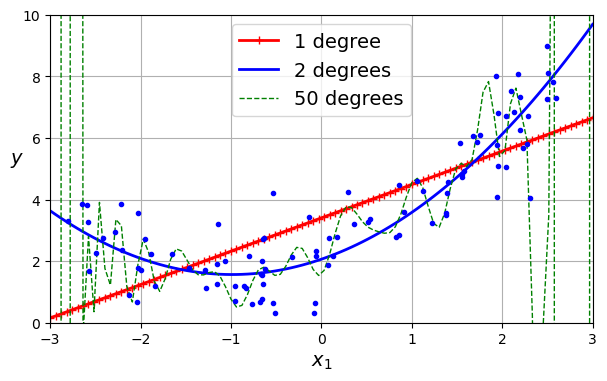

In [51]:
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(7,4))

for style,width,degree in (("r+-",2,1),("b-",2,2),("g--",1,50)):
    polybig_feature = PolynomialFeatures(degree=degree,include_bias=False)
    std_scalor = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_feature,std_scalor,lin_reg)
    
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, linewidth=width, label=label)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([-3,3,0,10])
plt.legend(loc="upper center")
plt.grid()
plt.show()

##  Learning Curves

In [69]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(model,X,y):
    
    train_sizes,train_scores,valid_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.01,1.0,40), cv=5,
              scoring="neg_root_mean_squared_error")

    train_errors = -train_scores.mean(axis=1)
    valid_errors = -valid_scores.mean(axis=1)

    plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
    plt.plot(train_sizes, valid_errors, "b--", linewidth=2, label="valid")

    plt.title("RMSE with respect to train and Valid Errors")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.grid()
    plt.legend(loc="upper right")
    plt.show()

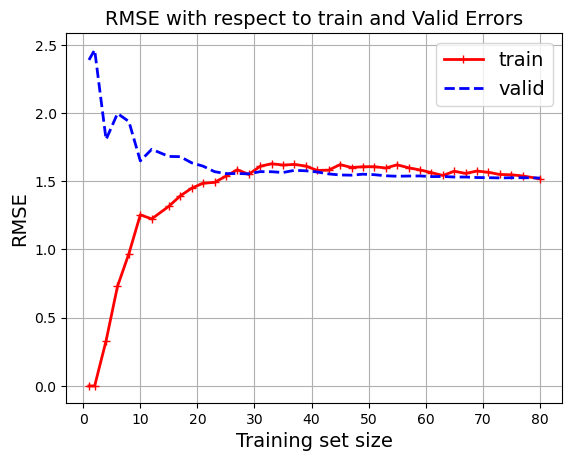

In [79]:
# setting up learning curves
lr = LinearRegression()

plot_learning_curves(lr,X,y)

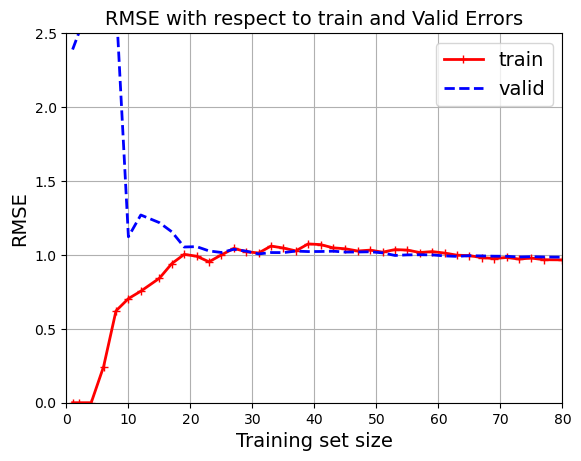

In [90]:
polynomial_regression = make_pipeline(PolynomialFeatures(degree=3,include_bias=False),LinearRegression())

train_sizes,train_scores,valid_scores = learning_curve(polynomial_regression, X, y, train_sizes=np.linspace(0.01,1.0,40), cv=5,
              scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b--", linewidth=2, label="valid")

plt.title("RMSE with respect to train and Valid Errors")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0,80,0,2.5])
plt.show()

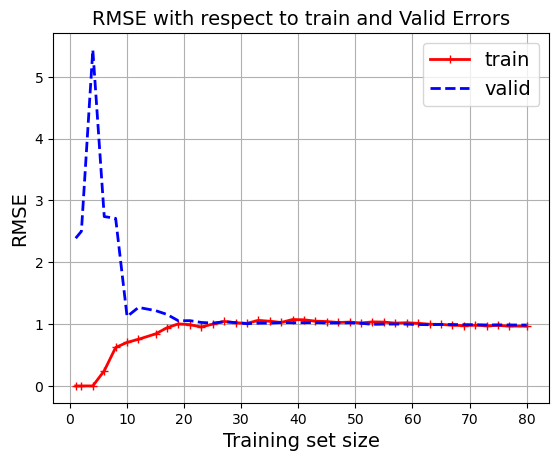

In [89]:
polynomial_regression = make_pipeline(PolynomialFeatures(degree=3,include_bias=False),LinearRegression())
plot_learning_curves(polynomial_regression,X,y)

In [93]:
from sklearn.metrics import mean_squared_error

def plot_learning_curve(model, X, y):
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")